# Access Publicly available High Resolution Spectroscopic Data


## Authors
Damien Ségransan (DACE Project Leader)

Nicolas Unger (DACE Data Scientist)

##  Goals
* Demonstrates how to use the DACE API's to navigate your way through data publicly available through DACE



## Keywords
**dace.spectroscopy**, Spectroscopy.query_database, Spectroscopy.download, Spectroscopy.get_timeseries<br> 


## Requirements
Anaconda 3, Python 3.8 or later, IPython 7.8.0<br>
**dace-query : 1.1.0 or later**

## Summary
In this example, you will query the DACE observation database, download severale products from the HARPS&CORALIE DRS and finally retrieve the radial velocity time series of a star.

## Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Load the dace API spectroscopy module
from dace_query.spectroscopy import Spectroscopy

2024-04-15 09:51:11,319 - WARNING - File .dacerc not found. You are requesting data in public mode. To change this behaviour, create a .dacerc file in your home directory and fill it with your API key. More infos on https://dace.unige.ch


### Query the DACE Observation Database
Here you'll search for all data publicly available for the star **HD106869**. We will request the output format to be a pandas DataFrame. 

In [2]:
observedTargets = Spectroscopy.query_database(
    limit=10000,
    filters={"public": {"is": True}, "obj_id_catname": {"contains": ["HD106869"]}},
    output_format="pandas",
)

In [3]:
# list the keys of the dictionary  - Un-comment the code below to have the full listing
for col in observedTargets.columns:
    print(col)

obj_id_catname
obj_pos_coordinates_hms_dms
ins_name
prog_id
obj_date_bjd
date_night
ins_drs_version
pub_bibcode
pub_ref
ins_mode
public
db_spectrum_available
obj_id_daceid
spectro_analysis_ca_flx_h
spectro_analysis_ca_flx_r1
spectro_analysis_protn84_err
spectro_analysis_smw
spectro_analysis_ca_flx_k_err
spectro_analysis_ca_flx_r2_err
spectro_analysis_halpha_flx_r2_err
spectro_analysis_halpha_flx_h_err
spectro_analysis_na_err
spectro_analysis_na_flx_r2_err
spectro_analysis_halpha_flx_r1
spectro_analysis_na_flx_d1
spectro_analysis_smw_err
spectro_analysis_halpha
spectro_analysis_na_flx_d1_err
spectro_analysis_na_flx_d2
spectro_analysis_halpha_flx_r1_err
spectro_analysis_na_flx_r2
spectro_analysis_ca_flx_r2
spectro_analysis_na_flx_d2_err
spectro_analysis_ca_flx_h_err
spectro_analysis_na_flx_r1
spectro_analysis_halpha_flx_r2
spectro_analysis_protn84
spectro_analysis_na_flx_r1_err
spectro_analysis_rhk
ins_adc_pos
obj_pos_mudelta
obj_pos_equinox
obj_pos_mualpha
obj_pos_radvel
file_rootpath
p

In [4]:
observedTargets[
    ["obj_id_catname", "obj_date_bjd", "date_night", "ins_name", "file_rootpath"]
]

,obj_id_catname,obj_date_bjd,date_night,ins_name,file_rootpath
0,HD106869,54828.779333,2008-12-27,CORALIE07,coralie07/DRS-3.4/reduced/2008-12-27/CORALIE.2...
1,HD106869,54823.823460,2008-12-22,CORALIE07,coralie07/DRS-3.4/reduced/2008-12-22/CORALIE.2...
2,HD106869,54831.810311,2008-12-30,CORALIE07,coralie07/DRS-3.4/reduced/2008-12-30/CORALIE.2...
3,HD106869,52355.778162,2002-03-21,CORALIE98,coralie98/DRS-3.3/reduced/2002-03-21/CORALIE.2...
4,HD106869,51776.504301,2000-08-19,CORALIE98,coralie98/DRS-3.3/reduced/2000-08-19/CORALIE.2...
...,...,...,...,...,...
59,HD106869,52343.715509,2002-03-09,CORALIE98,coralie98/DRS-3.3/reduced/2002-03-09/CORALIE.2...
60,HD106869,52404.604139,2002-05-09,CORALIE98,coralie98/DRS-3.3/reduced/2002-05-09/CORALIE.2...
61,HD106869,51751.469814,2000-07-25,CORALIE98,coralie98/DRS-3.3/reduced/2000-07-25/CORALIE.2...
62,HD106869,54829.839592,2008-12-28,CORALIE07,coralie07/DRS-3.4/reduced/2008-12-28/CORALIE.2...


### Download  HARPS DRS data products
Now that you have a complete list of the publicly available data for **HD106869**, you are able to download all the reduced data of one night and save them as a file in `'HD40307-1998_11_13-download_files.tar.gz'`

The raw files can be downloaded using the `download_files` method by giving the list of file paths. These can be retrieved from the `file_rootpath` column of the Spectroscopy databse (see above).

In [5]:
# Set current directory as download path
download_path = os.getcwd()

In [6]:
# Let's retireve the file name of the first observation available with CORALIE07
observedTargets.query("ins_name == 'CORALIE07'")["file_rootpath"].iloc[0]

'coralie07/DRS-3.4/reduced/2008-12-27/CORALIE.2008-12-28T06:38:35.552.fits'

In [7]:
# Download all the raw files
Spectroscopy.download_files(
    files=["coralie07/DRS-3.4/reduced/2008-12-22/CORALIE.2008-12-23T07:42:36.977.fits"],
    file_type="all",
    output_directory=download_path,
    output_filename="HD106869-download_files.tar.gz",
)

2023-11-23 10:10:31,321 - INFO - Downloading file on location : /home/nunger/Dropbox/Postdoc/DACE data import/DACE Tutorials/HD106869-download_files.tar.gz


 Download : 2 MB

2023-11-23 10:10:32,018 - INFO - File downloaded on location : /home/nunger/Dropbox/Postdoc/DACE data import/DACE Tutorials/HD106869-download_files.tar.gz


 Download : 3 MB
Download done


The same thing can be done by downloading the files with the `download` method by providing the filters. We do the same as above but using filters instead of the file rooth path.

The first argument, `file_type`, can be used to indicate which type of files are wanted. The options are: `['s1d', 's2d', 'ccf', 'bis', 'guidance', 'all']`

In [8]:
Spectroscopy.download(
    "all",
    filters={
        "date_night": {"contains": ["2008-12-22"]},
        "obj_id_catname": {"contains": ["HD106869"]},
    },
    output_directory=download_path,
    output_filename="HD106869-2008-12-22-download.tar.gz",
)

2023-11-23 10:10:32,730 - INFO - Downloading file on location : /home/nunger/Dropbox/Postdoc/DACE data import/DACE Tutorials/HD106869-2008-12-22-download.tar.gz
2023-11-23 10:10:33,182 - INFO - File downloaded on location : /home/nunger/Dropbox/Postdoc/DACE data import/DACE Tutorials/HD106869-2008-12-22-download.tar.gz


 Download : 3 MB
Download done


### Retrieve and display HD106869 time series
Retrieve the different time series of HD106869 that are extracted from the high resolution spectra. It includes, the radial velocity, the CCF FHWM, the CCF-BIS and different activity indices.

Text(0, 0.5, 'Radial Velocity [m/s]')

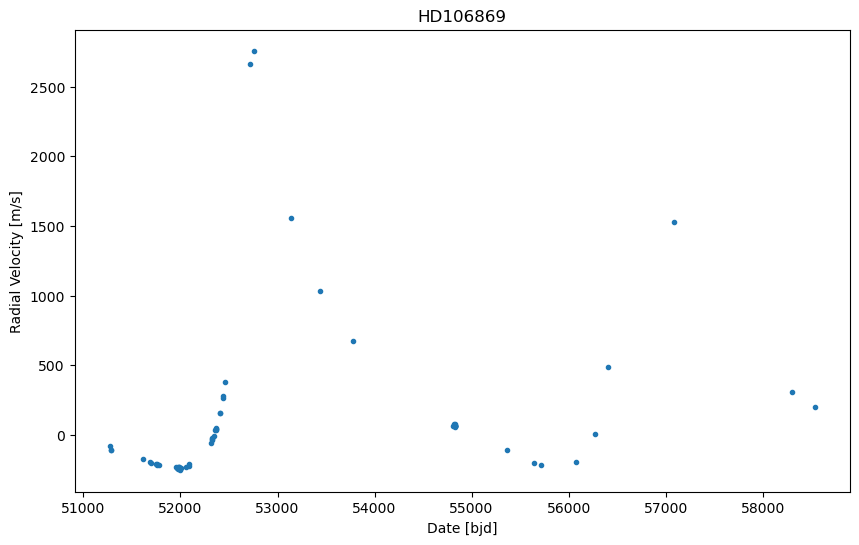

In [9]:
# Get RV time series for a given target
spectro_time_series = Spectroscopy.get_timeseries(
    "HD106869", sorted_by_instrument=False, output_format="pandas"
)

# Remove two outliers that this dataset has
# These were taken on the nights of 2003-03-12 and 2013-01-26
spectro_time_series.drop(
    spectro_time_series.query("date_night == '2003-03-12'").index, inplace=True
)
spectro_time_series.drop(
    spectro_time_series.query("date_night == '2013-01-26'").index, inplace=True
)

date_d = spectro_time_series["rjd"]
rv_mps = spectro_time_series["rv"]
erv_mps = spectro_time_series["rv_err"]

# Display publicly available Radial Velocities as function of time
plt.figure(figsize=(10, 6))
plt.title("HD106869")
plt.errorbar(
    date_d,
    rv_mps - np.median(rv_mps),
    yerr=erv_mps,
    fmt=".",
)
plt.xlabel("Date [bjd]")
plt.ylabel("Radial Velocity [m/s]")

## Checking for correlations

One of the things we can do is check for correlations between the RVs and activity indicators by plotting a scatter plot of any two observables.

Text(0.5, 1.0, 'HD106869')

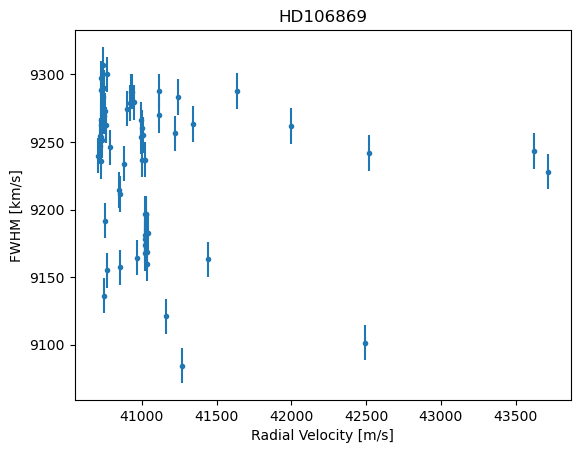

In [10]:
# Scatter plot of the RVs and the FWHM of the CCF
plt.errorbar(
    rv_mps,
    spectro_time_series["fwhm"],
    yerr=spectro_time_series["fwhm_err"],
    xerr=erv_mps,
    fmt=".",
)
plt.xlabel("Radial Velocity [m/s]")
plt.ylabel("FWHM [km/s]")
plt.title("HD106869")

(c) 2023 Data & Analysis Center for Exoplanets, Univerity of Geneva, Switzerland